<a href="https://colab.research.google.com/github/shoaib-intro/AIML/blob/main/Universal_Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentence Embedding by Universal Encpoder

Natural Language Processing (NLP) has advanced a lot with new deep learning (DL) architectures coming up every day. With new architectures, tons of new applications pop up, constantly pushing the boundaries. Coupled with powerful processing units which are coming up fast, DL applications are growing increasingly popular. Universal Sentence Encoder is a transformer-based NLP model widely used for embedding sentences or words. Further, the embedding can be used used for text clustering, classification and more.

 The model was developed by Google Research team and jump here to read the original paper Daniel Cer et. al. The model’s available at the official TF-Hub page. 

With that, we’ll build a **semantic** search engine that can be used for searching similar text in a database. Though we can use tags to search in a database, using a semantic search proves to be better. Because a search tool that understands the semantic meaning of text could provide better results. Henceforth, we’ll build a search model that searches an embedding database to find matches. First, we’ll see how to use the Universal Sentence Encoder model to embed sentences. Let’s dive in!

In [11]:
# Install the latest Tensorflow version.
# !pip3 install --upgrade tensorflow
# Install TF-Hub.
# !pip3 install tensorflow-hub
# !pip3 install seaborn

In [4]:
#Python3
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import seaborn as sns

### Downloading The Sentence Encoder Model Using Tf-Hub

In [5]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url) #download and load the model
print("Done!")

Done!


In [6]:
doc = ["how to add a theme in wordpress","What is gutenberg",
       "how to update my wordpress version",
       "how to customize site's appearance in wordpress",
       "can we add a logo to the site?",
       "why do my images appear in black and white though they are color",
       "why is my site speed too low?","which theme is lightweight and fast",
       "recent wordpress update crashes a lot","why my site is down",
       "which is the best free theme",
       "how to add google analytics to a wordpress"]
print("Total number of text samples: ",len(doc))

Total number of text samples:  12


### Generating Embedding With Universal Sentence Encoder
The model accepts a list of strings as input and returns a 512-dimensional vector as output. If the list contains “N” strings, the output would be of shape (N,512). The embedding can be generated by just passing the list of strings which is our text data bank.

In [7]:
bank_vec = model(doc)
print(bank_vec.shape)

(12, 512)


The embedding produced is just like BERT or ElMo vectors.

Now, let’s create a query sentence for which we want to find a match in the text data bank. And we’ll encode it too.

In [8]:
query = ["how to add a logo to my website"]
query_vec = model(query) #encodes the string in the list

The embedding vector produced by the Universal Sentence Encoder model is already normalized. That is, it’s values are in the range       [0 to 1]. Therefore, to find the similarity between two vectors, it’s enough to compute their inner product. Because inner product between normalized vectors is the same as finding the cosine similarity.

In [9]:
correlation = np.transpose(np.inner(query_vec,bank_vec))

The correlation matrix would have a shape of (N,1) where N is the number of strings in the text bank list. Each of the rows in the (N,1) matrix gives is similarity score. The ith row gives the similarity between the ith string in the text bank and the query string.

### Visualizing The Correlation Matrix
Finally, let’s see which string in the text bank is similar to the query string by plotting a heatmap. In fact, this gives a clear view of how similar is each one of the sentences to the query.

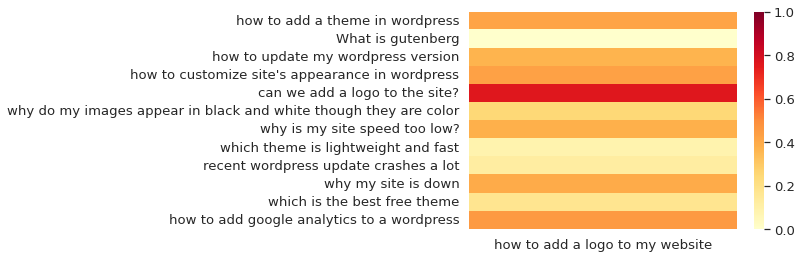

In [10]:
sns.set(font_scale=1.2)
g = sns.heatmap(
      correlation,
      xticklabels=query,
      yticklabels=doc,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")

This kind of semantic search can be used in answering customer queries that are similar to already answered ones. Rather than answering again, we can pull out the answer from an answered query which is similar. And in many more applications! 